In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings
warnings.filterwarnings('ignore')
np.random.seed(7)

In [2]:
df = pd.read_csv("Aquifer_Petrignano.csv")# read table
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [3]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [4]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']
targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [5]:
from datetime import datetime, date
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})
'''
Characteristics:
rainfall:rainfall indicates the amount of rainfall (mm)
temperature: temperature indicates the temperature (degrees Celsius)
drainage_volume: volume indicates the amount of water removed from the drinking water treatment plant (cubic metres)
river_hydrometry: hydrometry indicates the groundwater level (metres)
Target:
depth_to_groundwater: depth_to_groundwater indicates the groundwater level (depth above ground in metres)
'''

'\nCharacteristics:\nrainfall:rainfall indicates the amount of rainfall (mm)\ntemperature: temperature indicates the temperature (degrees Celsius)\ndrainage_volume: volume indicates the amount of water removed from the drinking water treatment plant (cubic metres)\nriver_hydrometry: hydrometry indicates the groundwater level (metres)\nTarget:\ndepth_to_groundwater: depth_to_groundwater indicates the groundwater level (depth above ground in metres)\n'

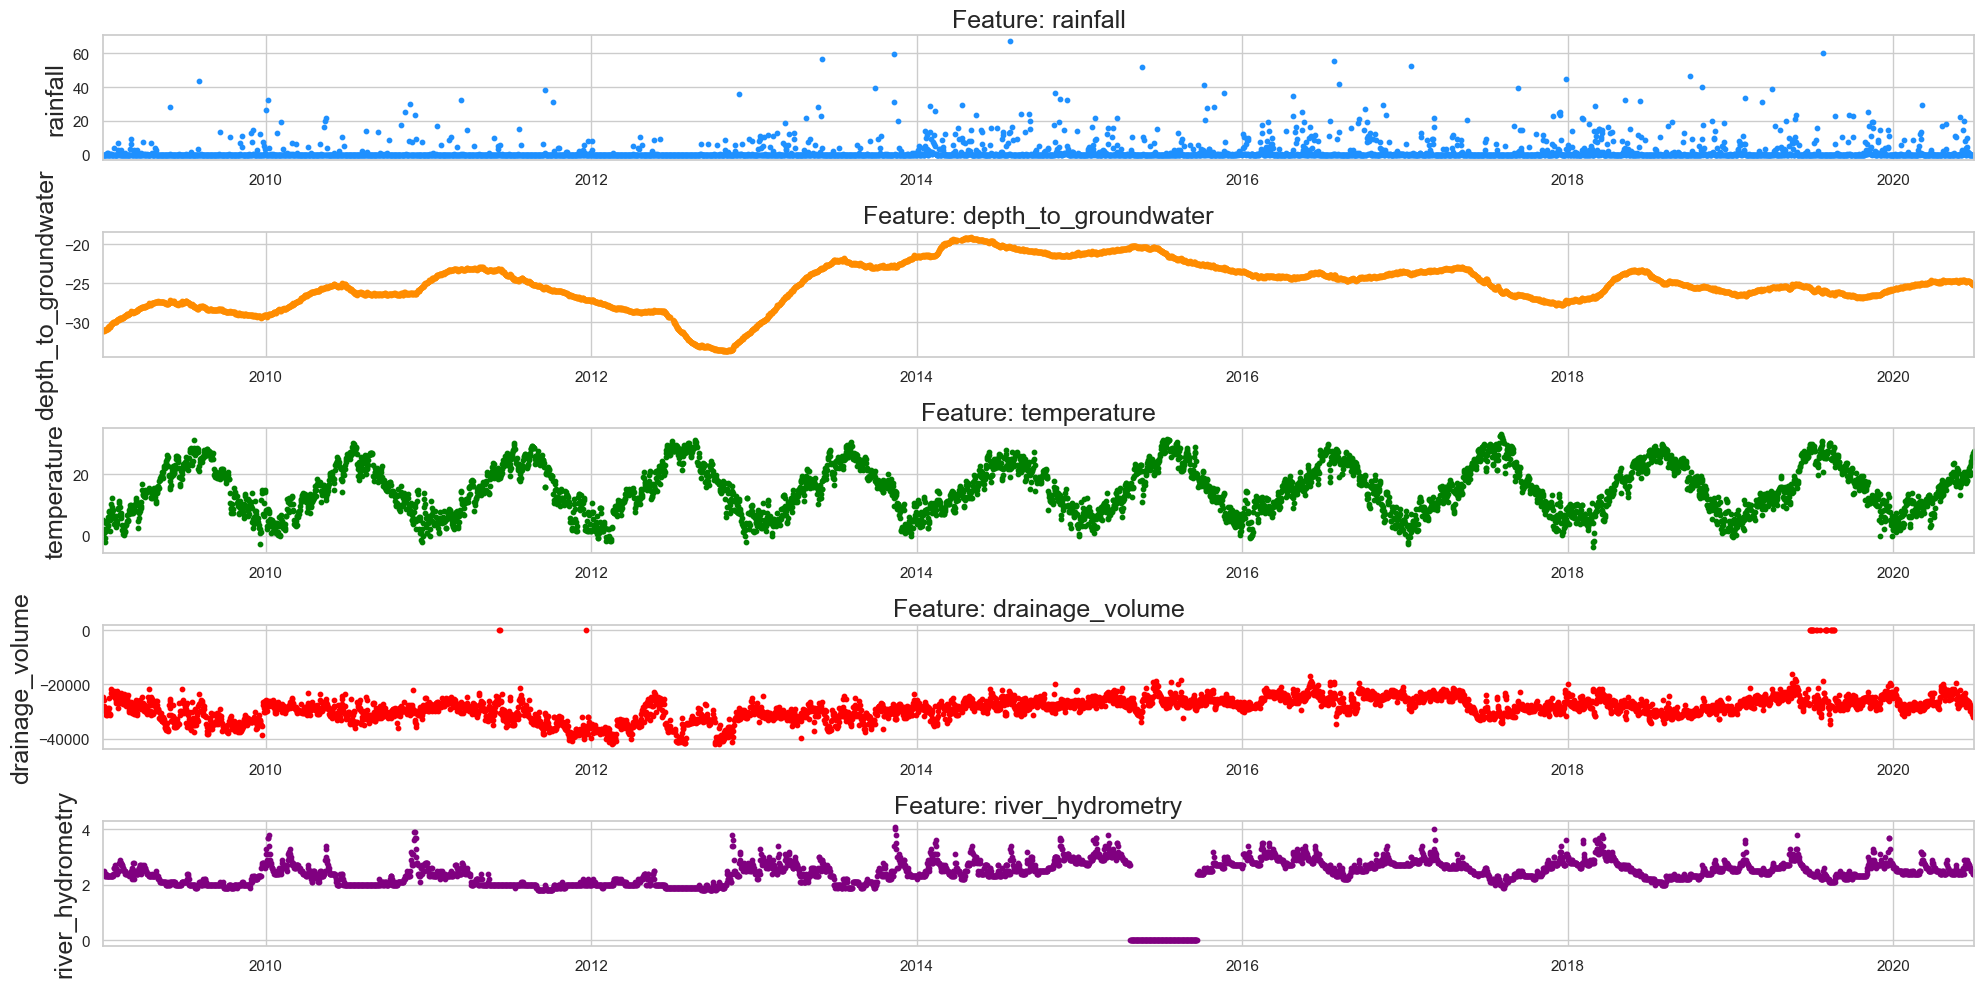

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Set the global font to the new Roman
plt.rcParams['font.family'] = 'serif'  # Setting font families
plt.rcParams['font.serif'] = ['Times New Roman']  # Setting font name
# Set Seaborn theme to "darkgrid"
sns.set_theme(style="whitegrid")

# Custom point colour and style
point_colors = ['dodgerblue', 'darkorange', 'green', 'red', 'purple']

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 10))

for i, column in enumerate(df.drop('date', axis=1).columns):
    ax[i].scatter(df['date'], df[column], s=10, color=point_colors[i % len(point_colors)])
    ax[i].set_title('Feature: {}'.format(column), fontsize=18)
    ax[i].set_ylabel(ylabel=column, fontsize=18)

    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
#plt.savefig(fname='Data_Scatter_Plot_2.png', dpi=600)
plt.show()

In [7]:
df = df.sort_values(by='date')#Ensure that data are in chronological order
# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)#Create a new column 'delta' which contains the time difference between each time point and the previous time point. This can be used to check that the time intervals are even
df[['date', 'delta']].head()
df['delta'].sum(), df['delta'].count()#Calculate the sum and count of the time interval column 'delta' for the sum of the time interval and the number of data points.
df = df.drop('delta', axis=1)#Remove the added 'delta' column as it is only used to check the time interval and there is no need to keep it.

(14245.0, 18443.0)

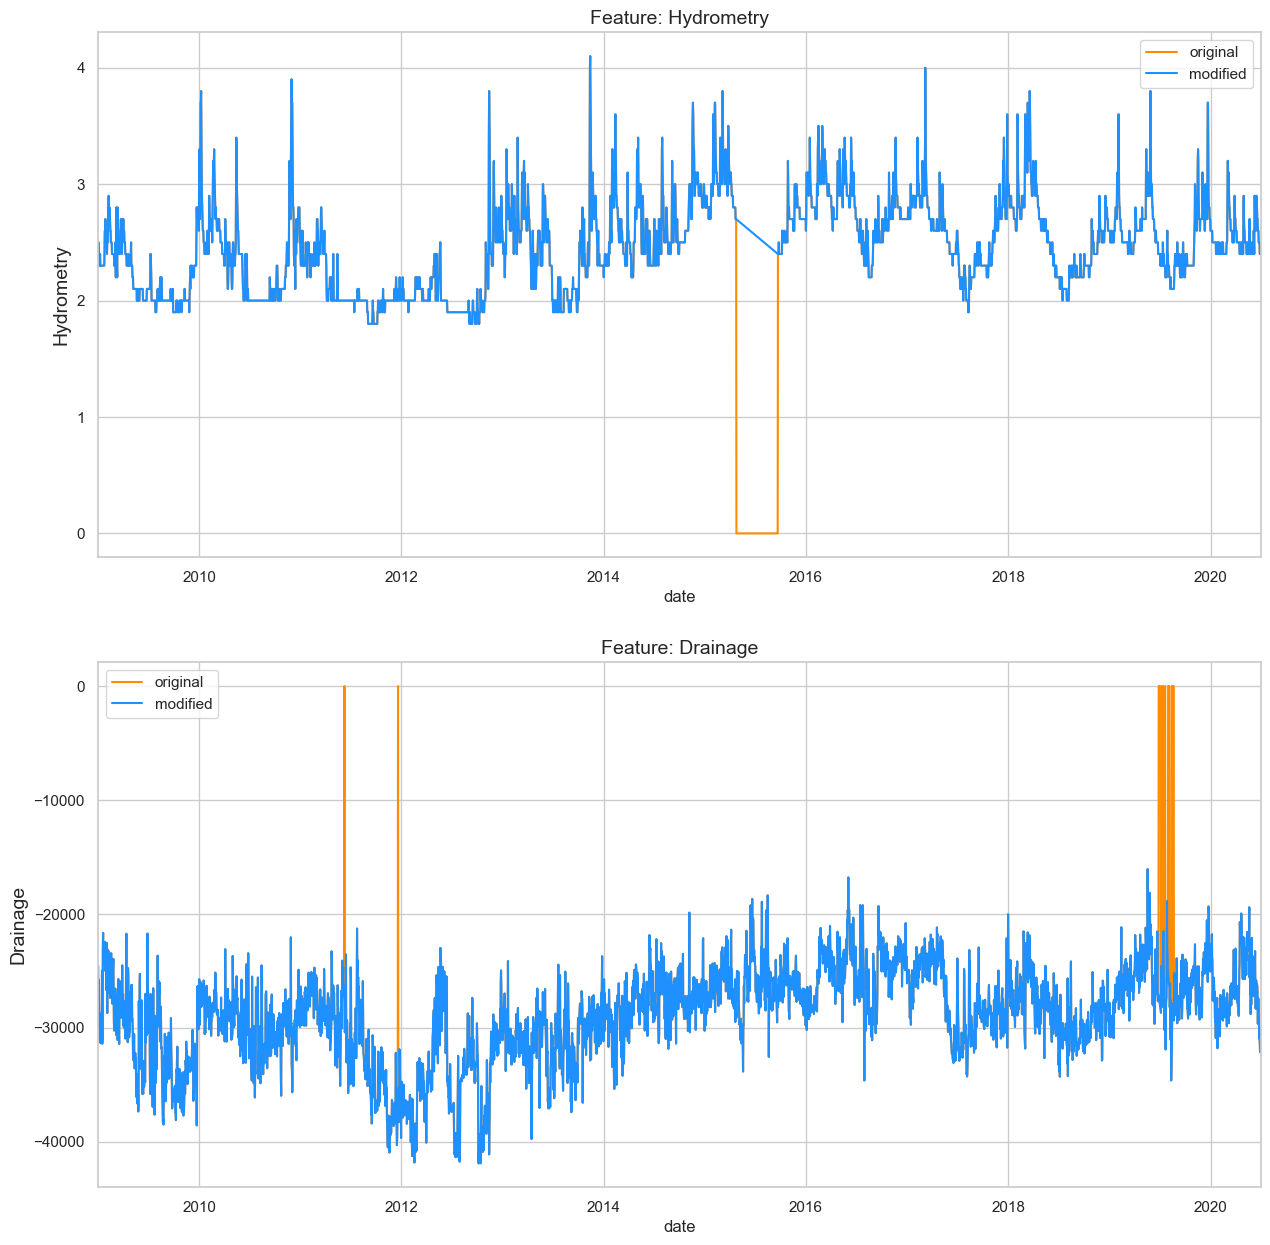

In [8]:
#This code creates a graph with two subgraphs for visualising outliers in the data.
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)
sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)
sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
#plt.savefig(fname='data_anomaly.png',dpi=600)

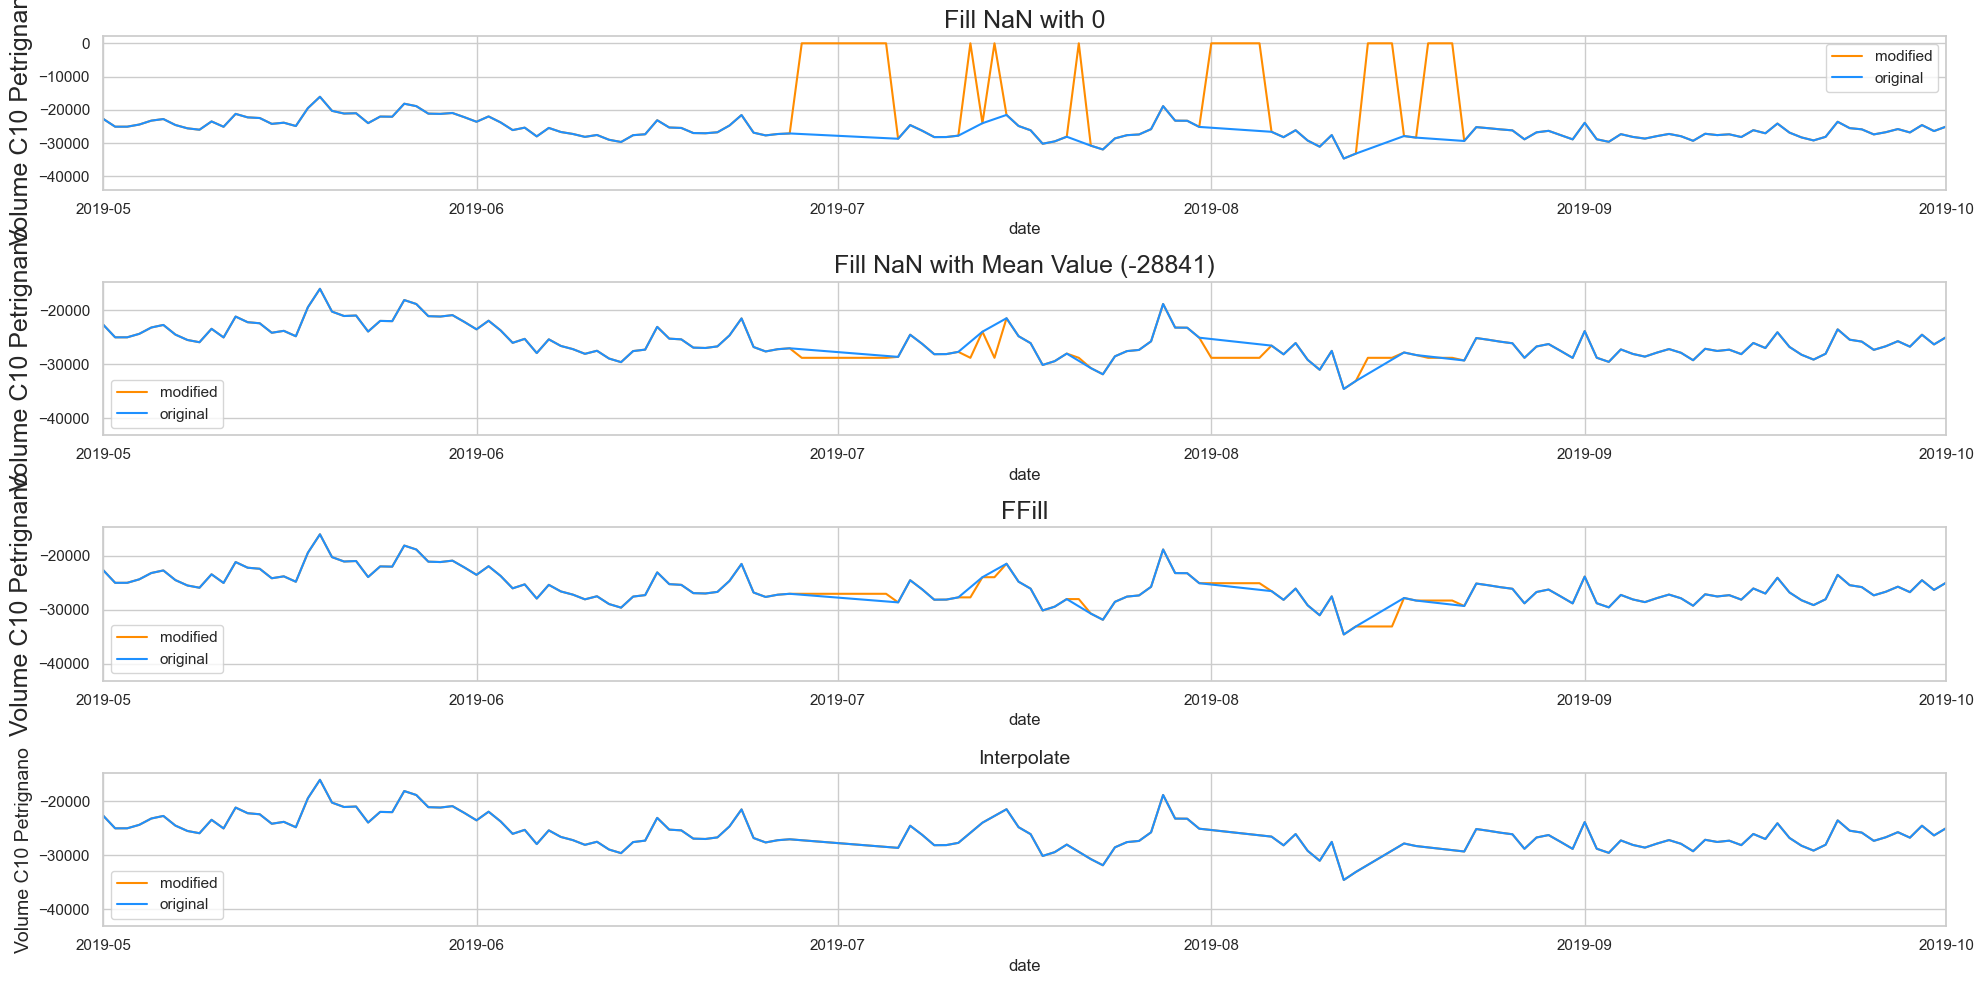

In [9]:
#A graph containing four subgraphs was created to compare different data processing methods to deal with missing values in the data.
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 10))
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=18)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=18)

mean_drainage = df['drainage_volume'].mean()
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=18)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=18)

sns.lineplot(x=df['date'], y=df['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=18)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=18)

sns.lineplot(x=df['date'], y=df['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
#plt.savefig(fname='Data_processing_methods.png', dpi=600)
plt.show()

In [10]:
#Filling missing values
df['drainage_volume'] = df['drainage_volume'].interpolate()#Interpolation process to fill in missing values with interpolation methods
df['river_hydrometry'] = df['river_hydrometry'].interpolate()
df['depth_to_groundwater'] = df['depth_to_groundwater'].interpolate()

In [11]:
#df.to_csv('data1.csv',index=False)

In [12]:
df1=df.drop("date",axis=1)
df1

,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,0.0,-31.14,5.2,-24530.688,2.4
1,0.0,-31.11,2.3,-28785.888,2.5
2,0.0,-31.07,4.4,-25766.208,2.4
3,0.0,-31.05,0.8,-27919.296,2.4
4,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...
4194,0.0,-25.07,25.7,-29930.688,2.5
4195,0.0,-25.11,26.2,-31332.960,2.4
4196,0.0,-25.19,26.9,-32120.928,2.4
4197,0.0,-25.18,26.9,-30602.880,2.4


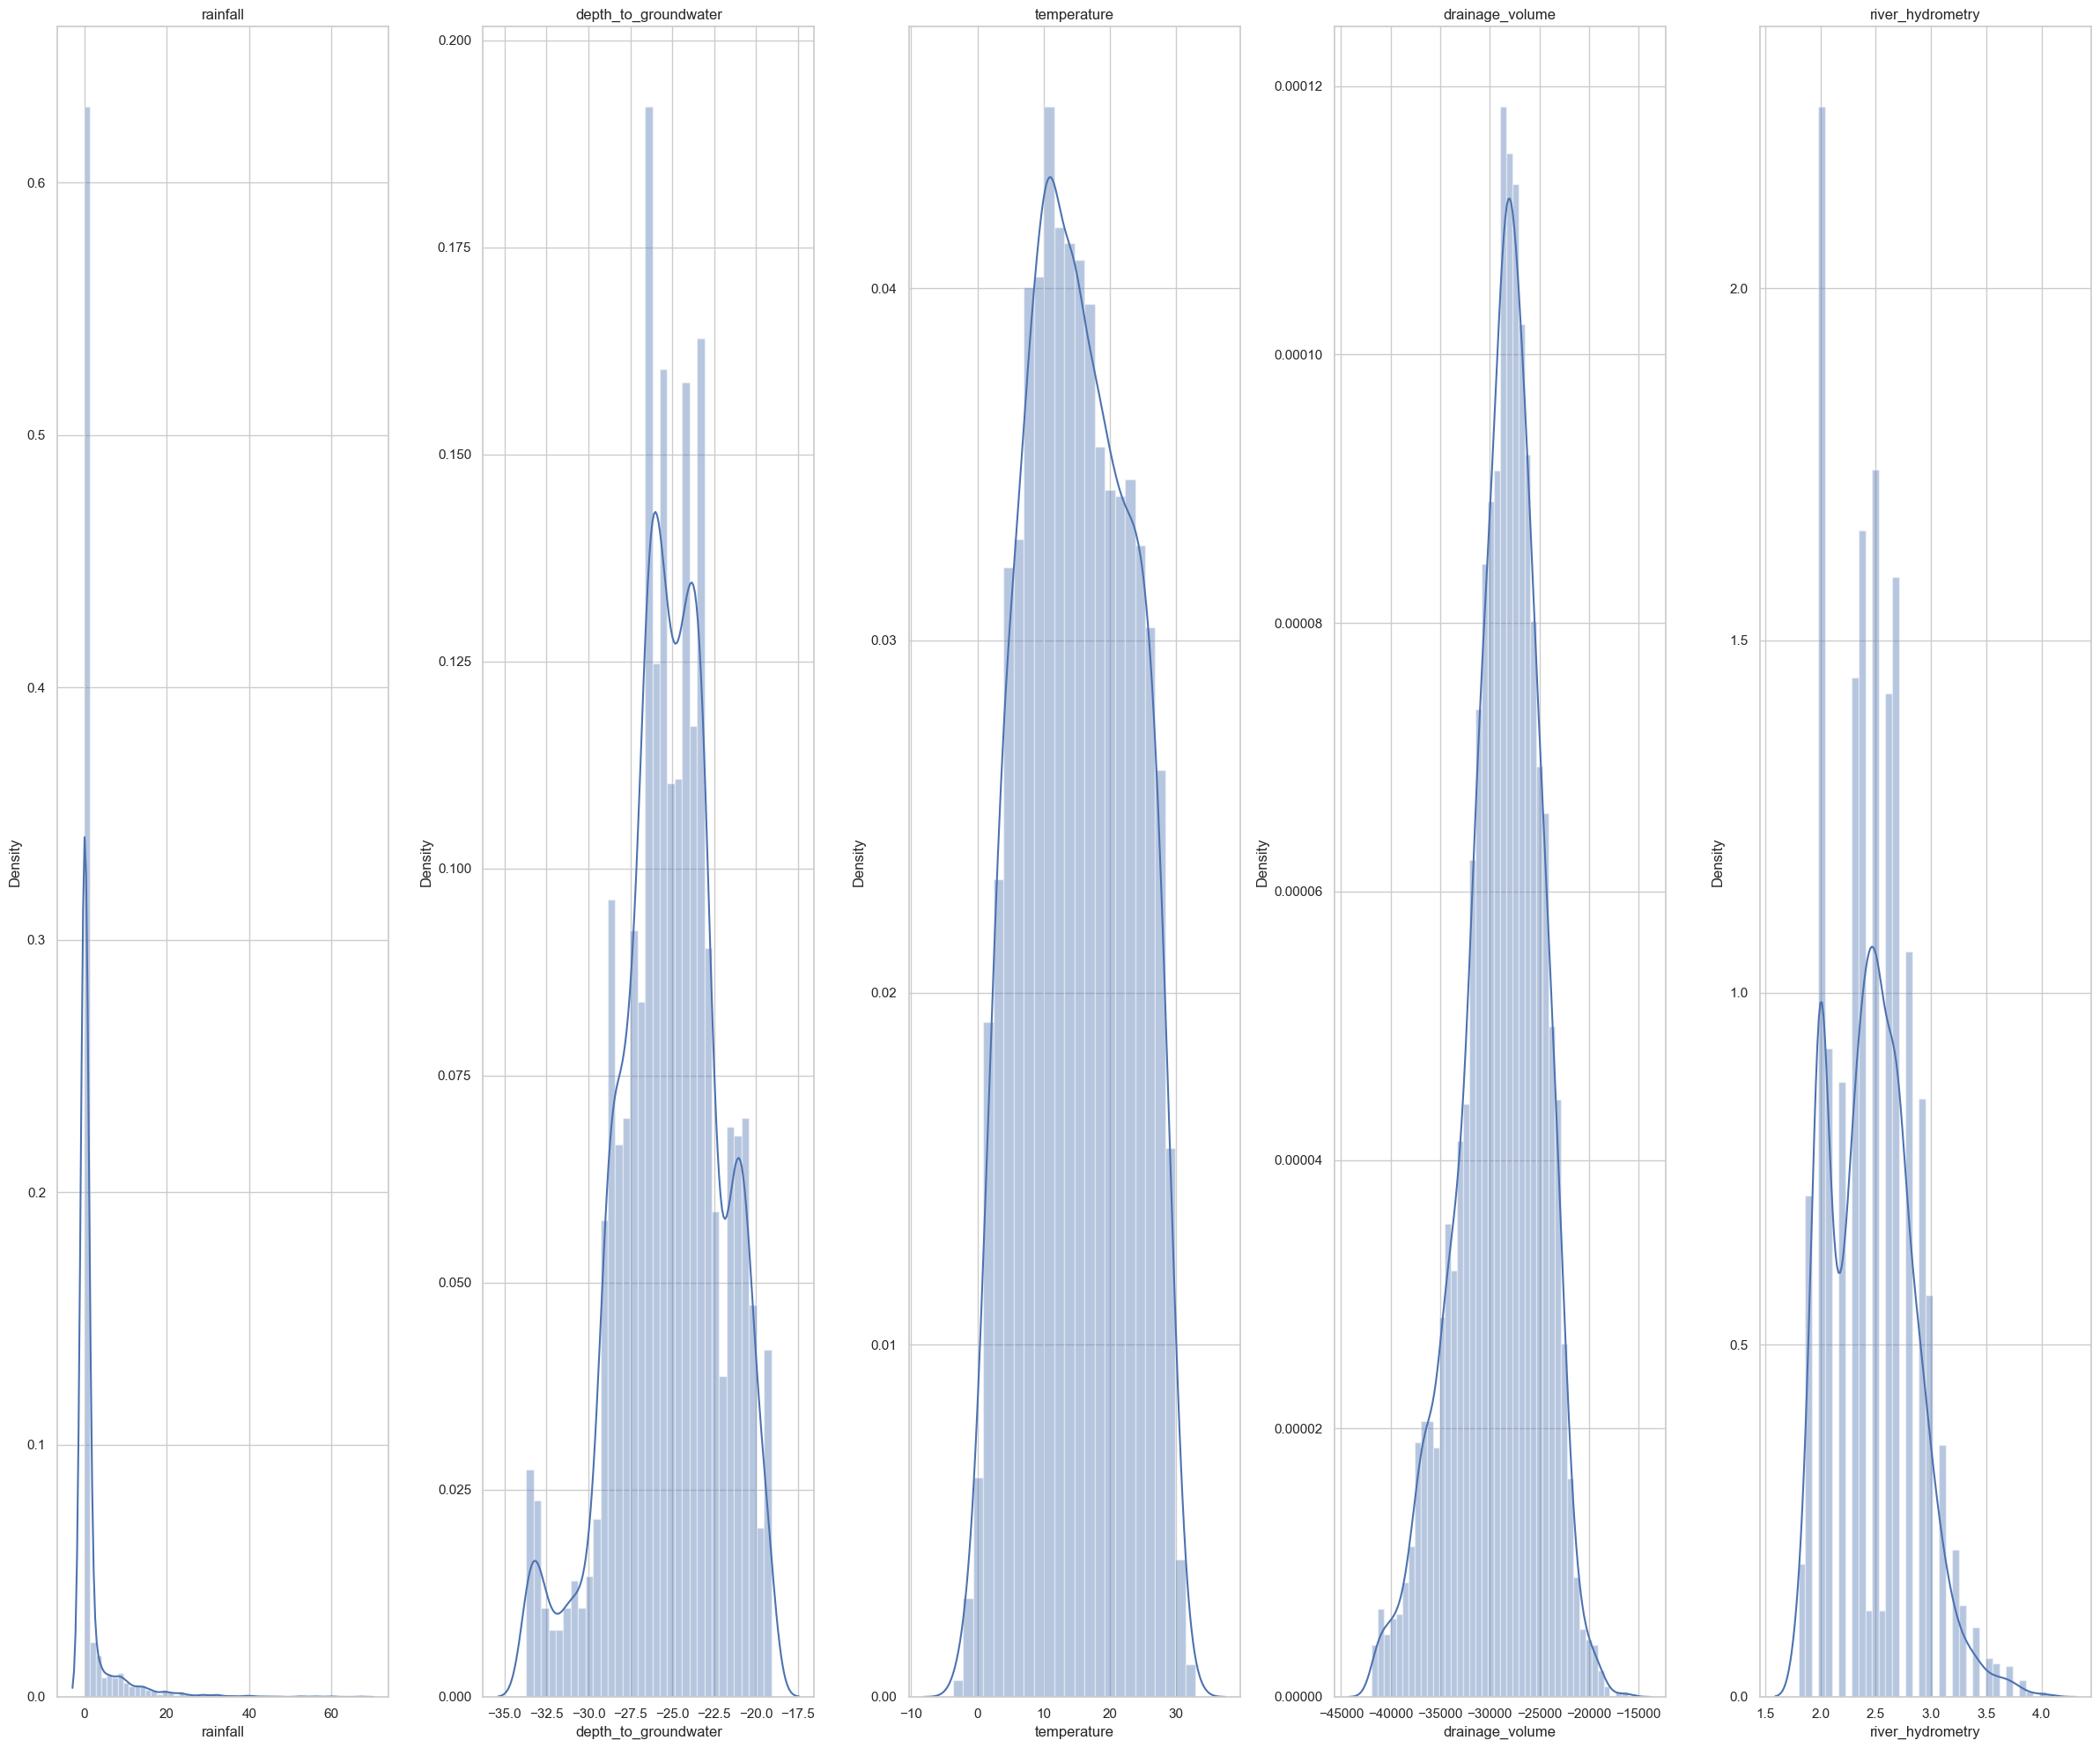

In [13]:
# Each subplot shows the distribution of individual columns in the DataFrame
import math
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'columns' is a list of column names from your DataFrame df1
columns = df1.columns
# Number of columns per subplot
ncols = 5
# Number of rows needed based on the number of columns
nrows = math.ceil(len(columns) / ncols)
# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 20))
# Flatten the axs array for easier indexing
axs = axs.ravel()
# Iterate over columns and create plots
for i, column in enumerate(columns):
    if column != 'DOGANELLA':  # Assuming 'DOGANELLA' is one of the columns you want to exclude
        sns.distplot(df1[column], ax=axs[i])
        axs[i].set_title(column)  # Set subplot title as the column name
# Remove any empty subplots
for i in range(len(columns), nrows * ncols):
    fig.delaxes(axs[i])
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()

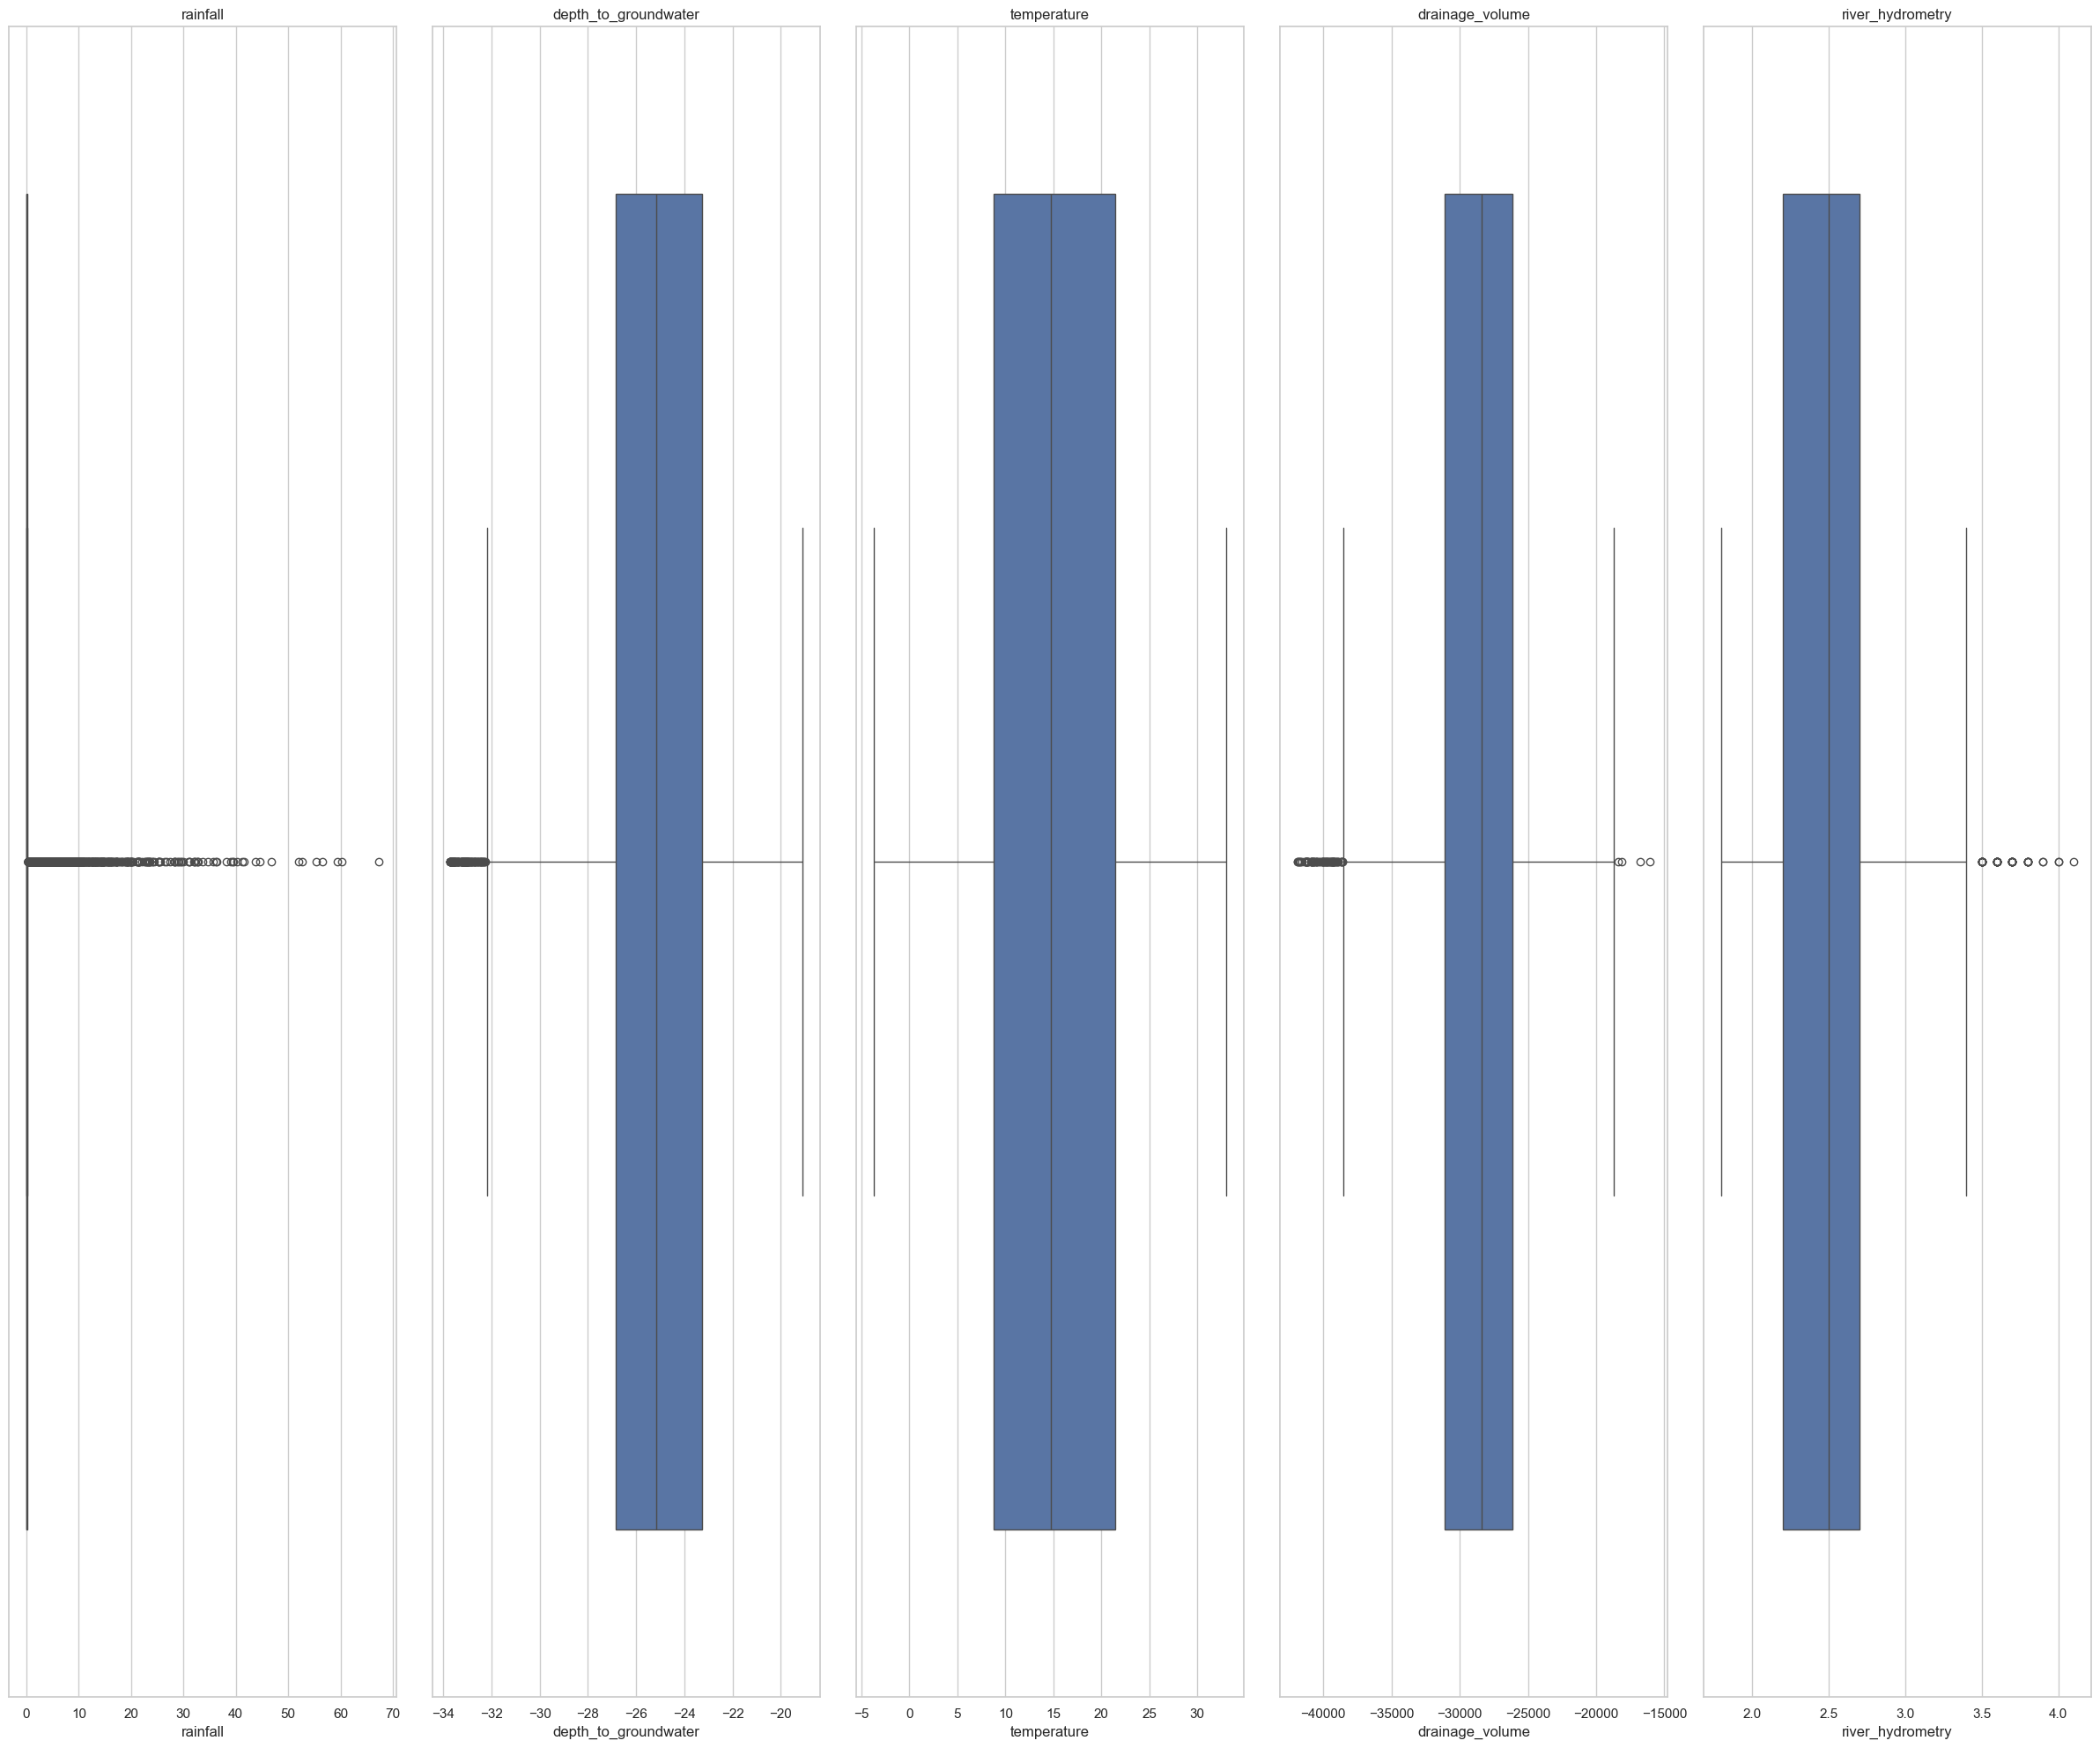

In [14]:
#Plot the box plots for each column in the DataFrame and remove outliers using the IQR (interquartile range) method.
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'columns' is a list of column names from your DataFrame df1
columns = df1.columns
# Number of columns per subplot
ncols = 5
# Number of rows needed based on the number of columns
nrows = math.ceil(len(columns) / ncols)
# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 20))
# Flatten the axs array for easier indexing
axs = axs.ravel()
# Iterate over columns and create box plots
for i, column in enumerate(columns):
    if column != 'DOGANELLA':  # Assuming 'DOGANELLA' is one of the columns you want to exclude
        sns.boxplot(x=df1[column], ax=axs[i])
        axs[i].set_title(column)  # Set subplot title as the column name

# Remove any empty subplots
for i in range(len(columns), nrows * ncols):
    fig.delaxes(axs[i])
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()
import pandas as pd

# Define a function that removes outliers based on box plots
def remove_outliers_iqr(df, columns):
    df_no_outliers = df.copy()
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers[col][(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)] = None
    return df_no_outliers

# Define the columns to process
columns_to_process = ['rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']
# Remove outliers in the box plot from df1
df1_no_outliers = remove_outliers_iqr(df1, columns_to_process)

In [15]:
# Filling in missing values using linear interpolation
df1_no_outliers_interpolated = df1_no_outliers.interpolate(method='linear')

In [16]:
df1_no_outliers_interpolated

,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,0.0,-31.14,5.2,-24530.688,2.4
1,0.0,-31.11,2.3,-28785.888,2.5
2,0.0,-31.07,4.4,-25766.208,2.4
3,0.0,-31.05,0.8,-27919.296,2.4
4,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...
4194,0.0,-25.07,25.7,-29930.688,2.5
4195,0.0,-25.11,26.2,-31332.960,2.4
4196,0.0,-25.19,26.9,-32120.928,2.4
4197,0.0,-25.18,26.9,-30602.880,2.4


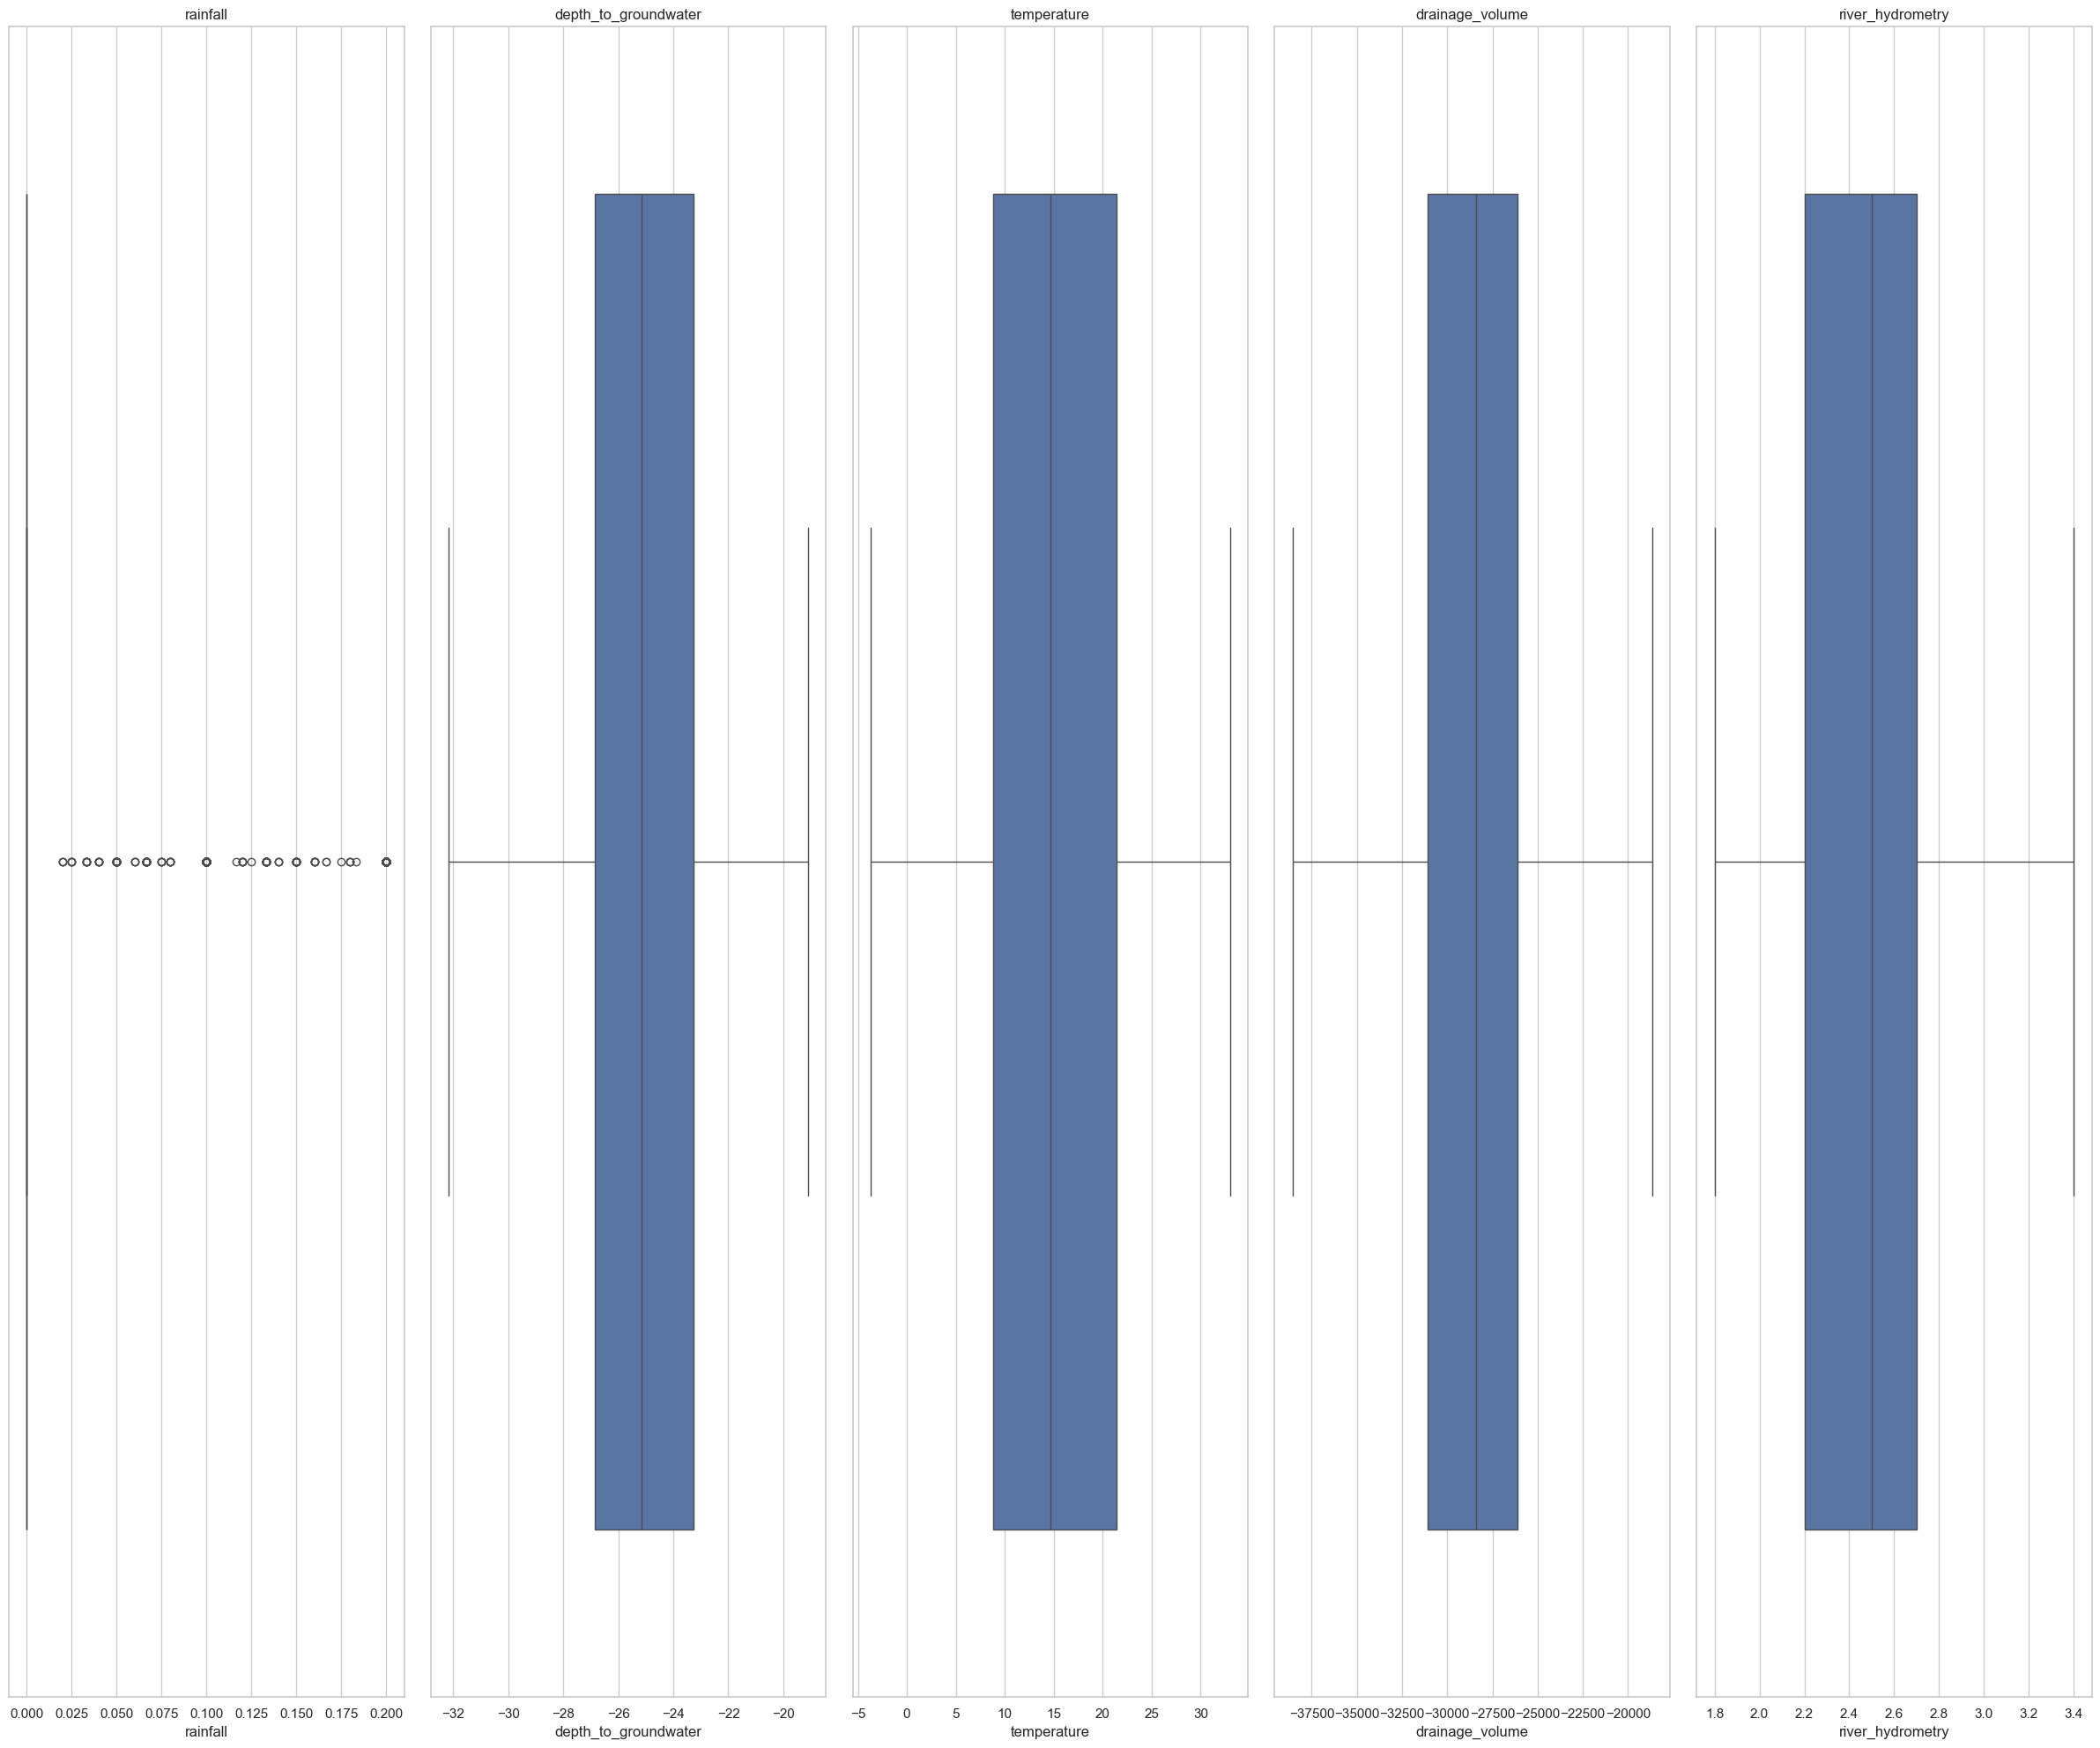

In [17]:
#Using box plots to check outliers and data distribution
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'columns' is a list of column names from your DataFrame df1
columns = df1_no_outliers_interpolated.columns
# Number of columns per subplot
ncols = 5
# Number of rows needed based on the number of columns
nrows = math.ceil(len(columns) / ncols)
# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 20))
# Flatten the axs array for easier indexing
axs = axs.ravel()
# Iterate over columns and create box plots
for i, column in enumerate(columns):
    if column != 'DOGANELLA':  # Assuming 'DOGANELLA' is one of the columns you want to exclude
        sns.boxplot(x=df1_no_outliers_interpolated[column], ax=axs[i])
        axs[i].set_title(column)  # Set subplot title as the column name
# Remove any empty subplots
for i in range(len(columns), nrows * ncols):
    fig.delaxes(axs[i])
# Adjust layout
plt.tight_layout()
# Display the plots
plt.show()

In [18]:
df1_no_outliers_interpolated.to_csv('data2')#Save Form

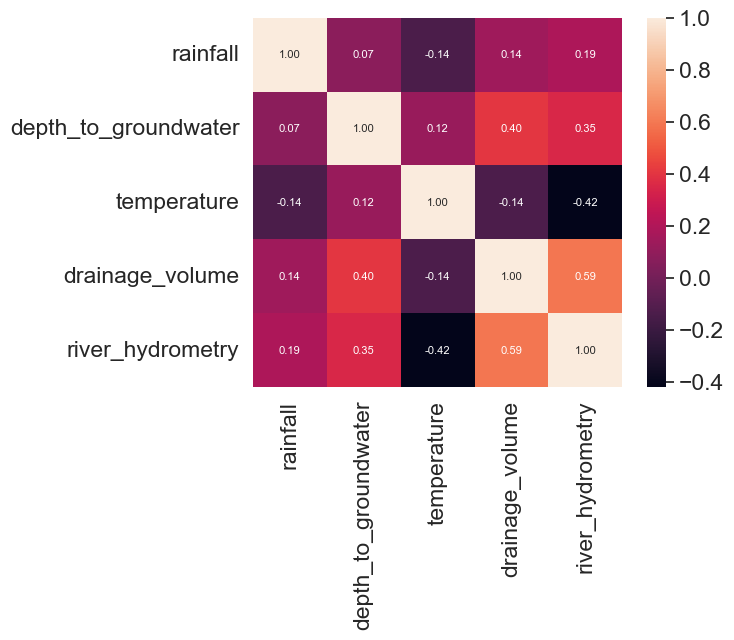

In [19]:
#Correlation heat mapping
cols=df1_no_outliers_interpolated.columns
cm = np.corrcoef(df1_no_outliers_interpolated[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size' : 8},yticklabels=cols,xticklabels=cols)
#plt.savefig(fname='correlation.png', dpi=600)

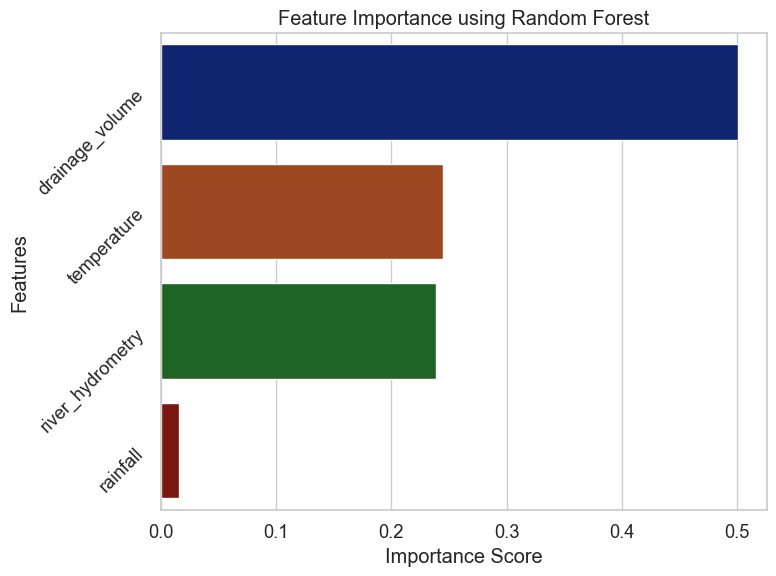

In [20]:
#A horizontal bar chart showing the importance scores of the individual features in the random forest model is plotted
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# Set the font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
# Set Seaborn Black Theme Style
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette("dark")

# Loading data
data = df1_no_outliers_interpolated

# Separation of features and target variables
X = data.drop('depth_to_groundwater', axis=1)
y = data['depth_to_groundwater']

# Creating a random forest regression model
rf_model = RandomForestRegressor(max_depth=5)

# Training Models
rf_model.fit(X, y)

# Obtaining feature significance
feature_importance = rf_model.feature_importances_

# Sort feature importance in descending order and obtain indexes
sorted_idx = np.argsort(feature_importance)[::-1]

# Rearranging the feature and importance arrays according to the sorted indexes
sorted_features = X.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Creating charts and sub-charts
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to draw a horizontal bar chart, note that the palette has been changed to "dark".
sns.barplot(x=sorted_importance, y=sorted_features, palette='dark')

ax.set_xlabel('Importance Score')
ax.set_ylabel('Features')
ax.set_title('Feature Importance using Random Forest')

# Rotate y-axis labels
plt.yticks(rotation=45)

# Adjustment of the layout
plt.tight_layout()

# save image
#plt.savefig('feature_importance_plot.png', dpi=300)

# show image
plt.show()

